In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
def plot_hyperparameter_heatmaps(grid_search, param_grid, model_name, dataset_name):
    scores = grid_search.cv_results_['mean_test_score'].reshape(len(param_grid['n_estimators']), len(next(iter(param_grid.values()))[1]))

    plt.figure(figsize=(12, 6))
    sns.heatmap(scores, annot=True, fmt=".3f", cmap="viridis",
                xticklabels=param_grid[next(iter(param_grid.keys()))[1]],
                yticklabels=param_grid['n_estimators'])
    plt.title(f"{model_name} Hyperparameter Tuning on {dataset_name}")
    plt.xlabel(list(param_grid.keys())[1])
    plt.ylabel('n_estimators')
    plt.show()

In [5]:
#the datasets
banknote_df = pd.read_csv('/content/data_banknote_authentication.csv')
glasstype_df = pd.read_csv('/content/glasstypePrediction.csv')
houseprice_df = pd.read_csv('/content/housePricePrediction.csv')

#check for missing values in banknote authentication dataset
missing_values_banknote = banknote_df.isnull().sum()

#check for missing values in glass type prediction dataset
missing_values_glasstype = glasstype_df.isnull().sum()

#feature scaling
scaler = StandardScaler()
scaled_features_glass = scaler.fit_transform(glasstype_df.drop('Type', axis=1))
scaled_glasstype_df = pd.DataFrame(scaled_features_glass, columns=glasstype_df.columns[:-1])

#preprocessing house price prediction dataset
houseprice_df = houseprice_df.drop('ADDRESS', axis=1)


categorical_features_house = houseprice_df.select_dtypes(include=['object']).columns
numerical_features_house = houseprice_df.select_dtypes(include=['int64', 'float64']).columns.drop('TARGET(PRICE_IN_LACS)')

encoder = OneHotEncoder(sparse=False, drop='first')
encoded_categorical_house = encoder.fit_transform(houseprice_df[categorical_features_house])
encoded_categorical_df_house = pd.DataFrame(encoded_categorical_house, columns=encoder.get_feature_names_out(categorical_features_house))

preprocessed_houseprice_df = pd.concat([houseprice_df[numerical_features_house], encoded_categorical_df_house], axis=1)

missing_values_houseprice = preprocessed_houseprice_df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [6]:
print("Banknote Dataset Missing Values:\n", missing_values_banknote)
print("\scaled glass type dataset:\n", scaled_glasstype_df.head())
print("\house price dataset missing values:\n", missing_values_houseprice)
print("\preprocessed house price dataset:\n", preprocessed_houseprice_df.head())

Banknote Dataset Missing Values:
 Variance_Wavelet    0
Skewness_Wavelet    0
Curtosis_Wavelet    0
Image_Entropy       0
Class               0
dtype: int64
\scaled glass type dataset:
          RI        Na        Mg        Al        Si         K        Ca  \
0  0.872868  0.284953  1.254639 -0.692442 -1.127082 -0.671705 -0.145766   
1 -0.249333  0.591817  0.636168 -0.170460  0.102319 -0.026213 -0.793734   
2 -0.721318  0.149933  0.601422  0.190912  0.438787 -0.164533 -0.828949   
3 -0.232831 -0.242853  0.698710 -0.310994 -0.052974  0.112107 -0.519052   
4 -0.312045 -0.169205  0.650066 -0.411375  0.555256  0.081369 -0.624699   

         Ba        Fe  
0 -0.352877 -0.586451  
1 -0.352877 -0.586451  
2 -0.352877 -0.586451  
3 -0.352877 -0.586451  
4 -0.352877 -0.586451  
\house price dataset missing values:
 UNDER_CONSTRUCTION    0
RERA                  0
BHK_NO.               0
SQUARE_FT             0
READY_TO_MOVE         0
RESALE                0
LONGITUDE             0
LATITUDE     

In [7]:
#train classifiers
def train_classifiers(X, y):
    random_forest_clf = RandomForestClassifier(random_state=42)
    adaboost_clf = AdaBoostClassifier(random_state=42)
    gradient_boost_clf = GradientBoostingClassifier(random_state=42)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    random_forest_clf.fit(X_train, y_train)
    adaboost_clf.fit(X_train, y_train)
    gradient_boost_clf.fit(X_train, y_train)

    rf_predictions = random_forest_clf.predict(X_test)
    ab_predictions = adaboost_clf.predict(X_test)
    gb_predictions = gradient_boost_clf.predict(X_test)

    rf_accuracy = accuracy_score(y_test, rf_predictions)
    ab_accuracy = accuracy_score(y_test, ab_predictions)
    gb_accuracy = accuracy_score(y_test, gb_predictions)

    return rf_accuracy, ab_accuracy, gb_accuracy

In [8]:
#train regressors
def train_regressors(X, y):

    random_forest_reg = RandomForestRegressor(random_state=42)
    adaboost_reg = AdaBoostRegressor(random_state=42)
    gradient_boost_reg = GradientBoostingRegressor(random_state=42)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    random_forest_reg.fit(X_train, y_train)
    adaboost_reg.fit(X_train, y_train)
    gradient_boost_reg.fit(X_train, y_train)

    rf_predictions = random_forest_reg.predict(X_test)
    ab_predictions = adaboost_reg.predict(X_test)
    gb_predictions = gradient_boost_reg.predict(X_test)

    rf_mse = mean_squared_error(y_test, rf_predictions)
    ab_mse = mean_squared_error(y_test, ab_predictions)
    gb_mse = mean_squared_error(y_test, gb_predictions)

    return rf_mse, ab_mse, gb_mse

In [9]:
#banknote authentication
X_banknote = banknote_df.drop('Class', axis=1)
y_banknote = banknote_df['Class']
rf_acc_banknote, ab_acc_banknote, gb_acc_banknote = train_classifiers(X_banknote, y_banknote)

#glass type prediction
X_glass = scaled_glasstype_df
y_glass = glasstype_df['Type']
rf_acc_glass, ab_acc_glass, gb_acc_glass = train_classifiers(X_glass, y_glass)

#house price prediction
X_houseprice = preprocessed_houseprice_df
y_houseprice = houseprice_df['TARGET(PRICE_IN_LACS)']
rf_mse_houseprice, ab_mse_houseprice, gb_mse_houseprice = train_regressors(X_houseprice, y_houseprice)

In [10]:
#the results
print(f"Banknote Authentication Accuracies:\nRF: {rf_acc_banknote}, AdaBoost: {ab_acc_banknote}, Gradient Boost: {gb_acc_banknote}\n")
print(f"Glass Type Prediction Accuracies:\nRF: {rf_acc_glass}, AdaBoost: {ab_acc_glass}, Gradient Boost: {gb_acc_glass}\n")
print(f"House Price Prediction MSE:\nRF: {rf_mse_houseprice}, AdaBoost: {ab_mse_houseprice}, Gradient Boost: {gb_mse_houseprice}\n")

Banknote Authentication Accuracies:
RF: 0.9927272727272727, AdaBoost: 0.9963636363636363, Gradient Boost: 1.0

Glass Type Prediction Accuracies:
RF: 0.8372093023255814, AdaBoost: 0.4883720930232558, Gradient Boost: 0.8604651162790697

House Price Prediction MSE:
RF: 139897.54902747445, AdaBoost: 165393.03803941823, Gradient Boost: 117120.16667952422



In [11]:
#Random forest grid
rf_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10]
}

#Gradient boosting grid
gb_param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1]
}

#Hyperparameter Tuning

#banknote authentication dataset
rf_grid_search_banknote = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=2, scoring='accuracy')
rf_grid_search_banknote.fit(X_banknote, y_banknote)
gb_grid_search_banknote = GridSearchCV(GradientBoostingClassifier(random_state=42), gb_param_grid, cv=2, scoring='accuracy')
gb_grid_search_banknote.fit(X_banknote, y_banknote)

#glass type prediction dataset
rf_grid_search_glass = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=2, scoring='accuracy')
rf_grid_search_glass.fit(X_glass, y_glass)
gb_grid_search_glass = GridSearchCV(GradientBoostingClassifier(random_state=42), gb_param_grid, cv=2, scoring='accuracy')
gb_grid_search_glass.fit(X_glass, y_glass)

#House price prediction dataset
rf_grid_search_houseprice = GridSearchCV(RandomForestRegressor(random_state=42), rf_param_grid, cv=2, scoring='neg_mean_squared_error')
rf_grid_search_houseprice.fit(X_houseprice, y_houseprice)
gb_grid_search_houseprice = GridSearchCV(GradientBoostingRegressor(random_state=42), gb_param_grid, cv=2, scoring='neg_mean_squared_error')
gb_grid_search_houseprice.fit(X_houseprice, y_houseprice)

# Output the best parameters and scores
print("Best parameters and score for Random Forest on banknote dataset:", rf_grid_search_banknote.best_params_, rf_grid_search_banknote.best_score_)
print("Best parameters and score for Gradient Boosting on banknote dataset:", gb_grid_search_banknote.best_params_, gb_grid_search_banknote.best_score_)
print("Best parameters and score for Random Forest on glass dataset:", rf_grid_search_glass.best_params_, rf_grid_search_glass.best_score_)
print("Best parameters and score for Gradient Boosting on glass dataset:", gb_grid_search_glass.best_params_, gb_grid_search_glass.best_score_)
print("Best parameters and score for Random Forest on houseprice dataset:", rf_grid_search_houseprice.best_params_, rf_grid_search_houseprice.best_score_)
print("Best parameters and score for Gradient Boosting on houseprice dataset:", gb_grid_search_houseprice.best_params_, gb_grid_search_houseprice.best_score_)


Best parameters and score for Random Forest on banknote dataset: {'max_depth': None, 'n_estimators': 100} 0.9934402332361516
Best parameters and score for Gradient Boosting on banknote dataset: {'learning_rate': 0.1, 'n_estimators': 100} 0.9927113702623906
Best parameters and score for Random Forest on glass dataset: {'max_depth': None, 'n_estimators': 100} 0.5841121495327102
Best parameters and score for Gradient Boosting on glass dataset: {'learning_rate': 0.1, 'n_estimators': 100} 0.5327102803738317
Best parameters and score for Random Forest on houseprice dataset: {'max_depth': None, 'n_estimators': 100} -48317.6596119949
Best parameters and score for Gradient Boosting on houseprice dataset: {'learning_rate': 0.1, 'n_estimators': 100} -40806.436677626974


In [12]:
#Training and Evaluation
for dataset_name, X, y, rf_best_params, gb_best_params in [
    ("Banknote Authentication", X_banknote, y_banknote, rf_grid_search_banknote.best_params_, gb_grid_search_banknote.best_params_),
    ("Glass Type Prediction", X_glass, y_glass, rf_grid_search_glass.best_params_, gb_grid_search_glass.best_params_)
]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_best = RandomForestClassifier(**rf_best_params, random_state=42)
    gb_best = GradientBoostingClassifier(**gb_best_params, random_state=42)

    rf_best.fit(X_train, y_train)
    gb_best.fit(X_train, y_train)

    for model_name, model in [("Random Forest", rf_best), ("Gradient Boosting", gb_best)]:
        predictions = model.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        precision = precision_score(y_test, predictions, average='weighted')
        recall = recall_score(y_test, predictions, average='weighted')
        f1 = f1_score(y_test, predictions, average='weighted')

        print(f"{model_name} on {dataset_name} - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")

X_train_hp, X_test_hp, y_train_hp, y_test_hp = train_test_split(X_houseprice, y_houseprice, test_size=0.2, random_state=42)

rf_best_hp = RandomForestRegressor(**rf_grid_search_houseprice.best_params_, random_state=42)
gb_best_hp = GradientBoostingRegressor(**gb_grid_search_houseprice.best_params_, random_state=42)

rf_best_hp.fit(X_train_hp, y_train_hp)
gb_best_hp.fit(X_train_hp, y_train_hp)

predictions_rf_hp = rf_best_hp.predict(X_test_hp)
predictions_gb_hp = gb_best_hp.predict(X_test_hp)

mse_rf_hp = mean_squared_error(y_test_hp, predictions_rf_hp)
mse_gb_hp = mean_squared_error(y_test_hp, predictions_gb_hp)

print(f"Random Forest on House Price - MSE: {mse_rf_hp}")
print(f"Gradient Boosting on House Price - MSE: {mse_gb_hp}")


Random Forest on Banknote Authentication - Accuracy: 0.9927272727272727, Precision: 0.9928242424242424, Recall: 0.9927272727272727, F1 Score: 0.9927228178234889
Gradient Boosting on Banknote Authentication - Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Random Forest on Glass Type Prediction - Accuracy: 0.8372093023255814, Precision: 0.866828165374677, Recall: 0.8372093023255814, F1 Score: 0.8330452594474481
Gradient Boosting on Glass Type Prediction - Accuracy: 0.8604651162790697, Precision: 0.8799372462163159, Recall: 0.8604651162790697, F1 Score: 0.8501294328106912
Random Forest on House Price - MSE: 139897.54902747445
Gradient Boosting on House Price - MSE: 117120.16667952422


In [13]:

#results to summarizes the accuracy for each ensemble model on each dataset
results = [
    {"Model": "Random Forest", "Dataset": "Banknote Authentication", "Metric": "Accuracy", "Score": 0.9927272727272727},
    {"Model": "Random Forest", "Dataset": "Banknote Authentication", "Metric": "Precision", "Score": 0.9928242424242424},
    {"Model": "Random Forest", "Dataset": "Banknote Authentication", "Metric": "Recall", "Score": 0.9927272727272727},
    {"Model": "Random Forest", "Dataset": "Banknote Authentication", "Metric": "F1 Score", "Score": 0.9927228178234889},

    {"Model": "Gradient Boosting", "Dataset": "Banknote Authentication", "Metric": "Accuracy", "Score": 1.0},
    {"Model": "Gradient Boosting", "Dataset": "Banknote Authentication", "Metric": "Precision", "Score": 1.0},
    {"Model": "Gradient Boosting", "Dataset": "Banknote Authentication", "Metric": "Recall", "Score": 1.0},
    {"Model": "Gradient Boosting", "Dataset": "Banknote Authentication", "Metric": "F1 Score", "Score": 1.0},

    {"Model": "Random Forest", "Dataset": "Glass Type Prediction", "Metric": "Accuracy", "Score": 0.8372093023255814},
    {"Model": "Random Forest", "Dataset": "Glass Type Prediction", "Metric": "Precision", "Score": 0.866828165374677},
    {"Model": "Random Forest", "Dataset": "Glass Type Prediction", "Metric": "Recall", "Score": 0.8372093023255814},
    {"Model": "Random Forest", "Dataset": "Glass Type Prediction", "Metric": "F1 Score", "Score": 0.8330452594474481},

    {"Model": "Gradient Boosting", "Dataset": "Glass Type Prediction", "Metric": "Accuracy", "Score": 0.8604651162790697},
    {"Model": "Gradient Boosting", "Dataset": "Glass Type Prediction", "Metric": "Precision", "Score": 0.8799372462163159},
    {"Model": "Gradient Boosting", "Dataset": "Glass Type Prediction", "Metric": "Recall", "Score": 0.8604651162790697},
    {"Model": "Gradient Boosting", "Dataset": "Glass Type Prediction", "Metric": "F1 Score", "Score": 0.8501294328106912},

    {"Model": "Random Forest", "Dataset": "House Price Prediction", "Metric": "MSE", "Score": 139897.54902747445},
    {"Model": "Gradient Boosting", "Dataset": "House Price Prediction", "Metric": "MSE", "Score": 117120.16667952422}
]

# Convert the comparison table to a pandas DataFrame and display it
comparison_df = pd.DataFrame(results)
print(comparison_df)


                Model                  Dataset     Metric          Score
0       Random Forest  Banknote Authentication   Accuracy       0.992727
1       Random Forest  Banknote Authentication  Precision       0.992824
2       Random Forest  Banknote Authentication     Recall       0.992727
3       Random Forest  Banknote Authentication   F1 Score       0.992723
4   Gradient Boosting  Banknote Authentication   Accuracy       1.000000
5   Gradient Boosting  Banknote Authentication  Precision       1.000000
6   Gradient Boosting  Banknote Authentication     Recall       1.000000
7   Gradient Boosting  Banknote Authentication   F1 Score       1.000000
8       Random Forest    Glass Type Prediction   Accuracy       0.837209
9       Random Forest    Glass Type Prediction  Precision       0.866828
10      Random Forest    Glass Type Prediction     Recall       0.837209
11      Random Forest    Glass Type Prediction   F1 Score       0.833045
12  Gradient Boosting    Glass Type Prediction   Ac

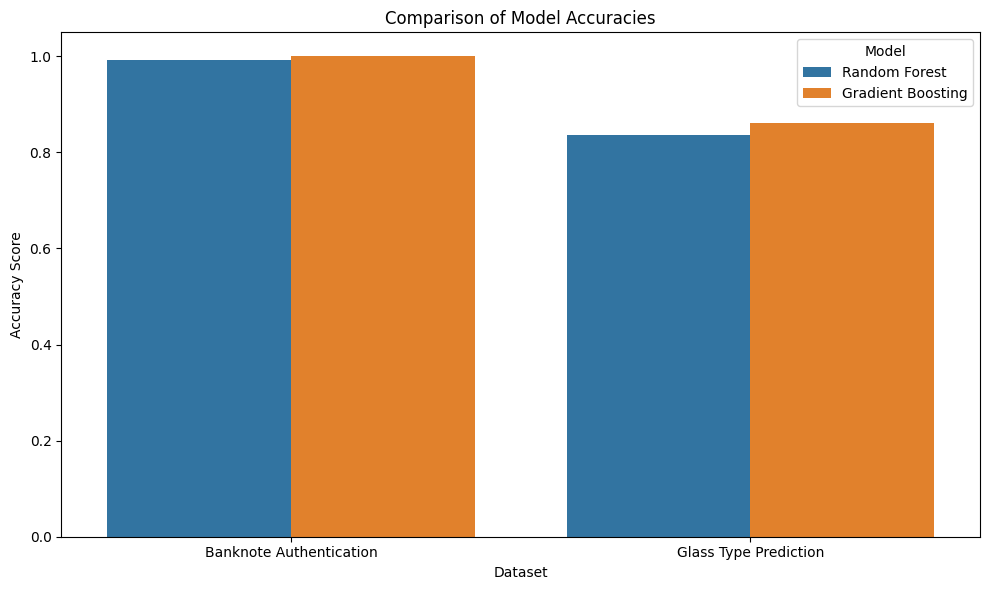

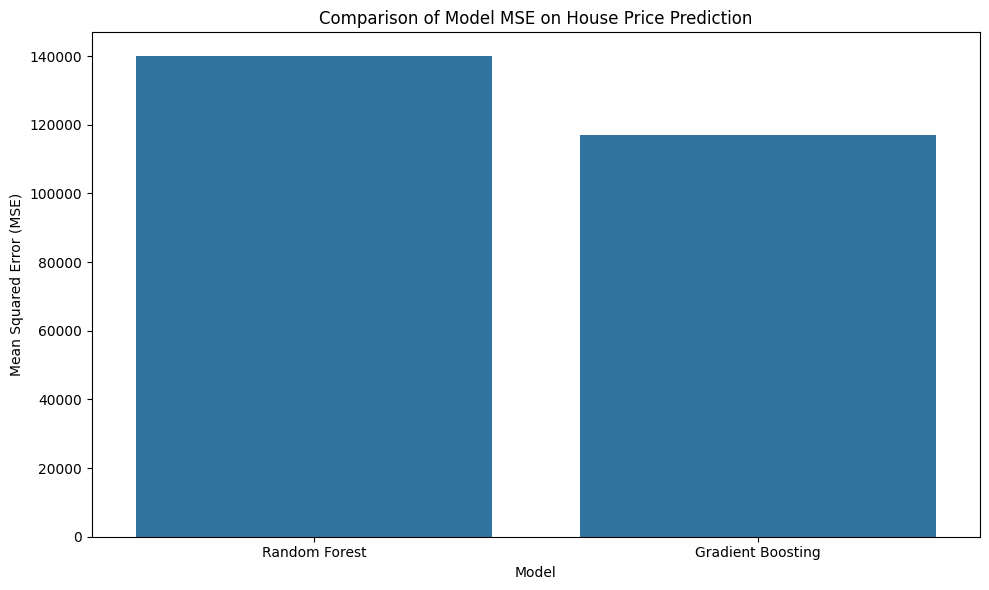

In [14]:
#Accuracy scores
accuracy_scores = {
    "Model": ["Random Forest", "Random Forest", "Gradient Boosting", "Gradient Boosting"],
    "Dataset": ["Banknote Authentication", "Glass Type Prediction", "Banknote Authentication", "Glass Type Prediction"],
    "Accuracy": [0.9927272727272727, 0.8372093023255814, 1.0, 0.8604651162790697]
}

#MSE scores
mse_scores = {
    "Model": ["Random Forest", "Gradient Boosting"],
    "Dataset": ["House Price Prediction", "House Price Prediction"],
    "MSE": [139897.54902747445, 117120.16667952422]
}

#convert dictionaries to DataFrames
accuracy_df = pd.DataFrame(accuracy_scores)
mse_df = pd.DataFrame(mse_scores)

#Accuracy comparison using bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x="Dataset", y="Accuracy", hue="Model", data=accuracy_df)
plt.title('Comparison of Model Accuracies')
plt.ylabel('Accuracy Score')
plt.xlabel('Dataset')
plt.legend(title='Model')
plt.tight_layout()
plt.show()

#MSE comparison using bar chart on house price prediction
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="MSE", data=mse_df)
plt.title('Comparison of Model MSE on House Price Prediction')
plt.ylabel('Mean Squared Error (MSE)')
plt.xlabel('Model')
plt.tight_layout()
plt.show()

conclusion:
Gradient Boosting achieved perfect accuracy on the Banknote dataset, suggesting clear class separability, while Random Forest also performed well. On the Glass dataset, both models showed lower accuracy, with Gradient Boosting slightly ahead, indicating more complexity. For House Price prediction, Gradient Boosting had a lower MSE, suggesting better performance on non-linear data. Overall, Gradient Boosting is better for higher predictive power and complex interactions but can overfit and is computationally expensive. Random Forest is robust, easier to use, and less prone to overfitting but might struggle with very noisy data. The choice between models depends on the problem specifics and available resources.
